<a href="https://colab.research.google.com/github/TirendazAcademy/Audio-Data-with-HuggingFace/blob/main/1_working_with_audio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and explore an audio dataset

In [1]:
!pip install -q datasets[audio]

In [2]:
import datasets
datasets.__version__

'3.6.0'

In [3]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [4]:
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [5]:
print(minds.features["lang_id"])
print(minds.features["lang_id"].num_classes)
print(minds.features["lang_id"].names)

ClassLabel(names=['cs-CZ', 'de-DE', 'en-AU', 'en-GB', 'en-US', 'es-ES', 'fr-FR', 'it-IT', 'ko-KR', 'nl-NL', 'pl-PL', 'pt-PT', 'ru-RU', 'zh-CN'], id=None)
14
['cs-CZ', 'de-DE', 'en-AU', 'en-GB', 'en-US', 'es-ES', 'fr-FR', 'it-IT', 'ko-KR', 'nl-NL', 'pl-PL', 'pt-PT', 'ru-RU', 'zh-CN']


In [6]:
minds.features["intent_class"]

ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None)

In [7]:
len(minds["intent_class"])

654

In [8]:
example = minds[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [9]:
id2label = minds.features["intent_class"].int2str
id2label

<bound method ClassLabel.int2str of ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None)>

In [10]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [11]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

In [12]:
!pip install -q gradio

In [13]:
import gradio as gr

def generate_audio():
    example = minds.shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label(example["intent_class"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.11/dist-packages/gradio/processing_utils.py:749: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://85da650785d98bc049.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://85da650785d98bc049.gradio.live


In [14]:
example = minds.shuffle()[0]
example

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~DIRECT_DEBIT/response_44.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~DIRECT_DEBIT/response_44.wav',
  'array': array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
         -0.00024414, -0.00024414]),
  'sampling_rate': 8000},
 'transcription': 'how can I view my direct debit history',
 'intent_class': 8}

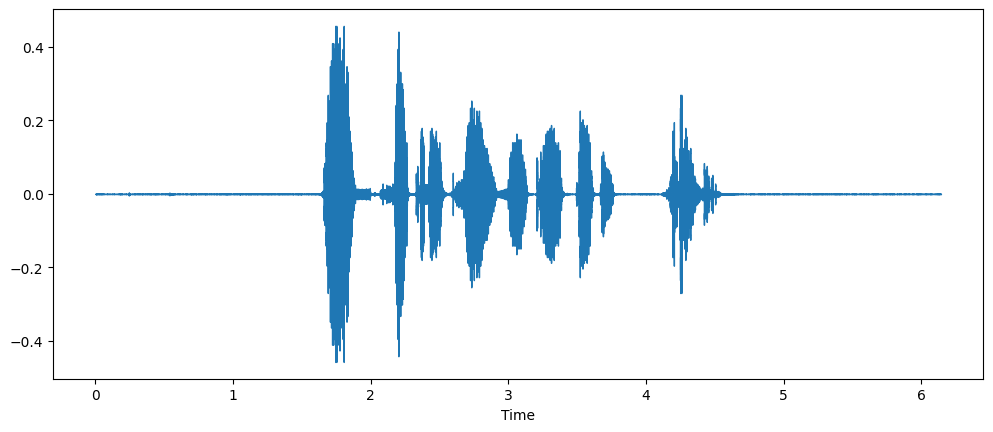

In [15]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

#  Preprocessing an audio dataset

## Resampling the audio data

In [16]:
minds[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

In [17]:
minds[0]["audio"]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.00024414,  0.0012207 ]),
 'sampling_rate': 8000}

In [18]:
# Get one audio sample
audio_sample = minds[0]["audio"]

# Print the sampling rate
print(audio_sample["sampling_rate"])

8000


In [19]:
from datasets import Audio

minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

In [20]:
minds[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/f9018fd3747971e77d59e6c5da3fdf9d5bb914c495e16c23e1fe47c921d76a7a/en-AU~PAY_BILL/response_4.wav',
  'array': array([2.36119668e-05, 1.92324660e-04, 2.19284790e-04, ...,
         9.40907281e-04, 1.16613181e-03, 7.20883254e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13}

## Filtering the dataset

In [21]:
MAX_DURATION_IN_SECONDS = 20.0

def is_audio_length_in_range(input_length):
    return input_length < MAX_DURATION_IN_SECONDS

In [22]:
# use librosa to get example's duration from the audio file
new_column = [librosa.get_duration(path=x) for x in minds["path"]]
minds = minds.add_column("duration", new_column)

# use 🤗 Datasets' `filter` method to apply the filtering function
minds = minds.filter(is_audio_length_in_range, input_columns=["duration"])

# remove the temporary helper column
minds = minds.remove_columns(["duration"])
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 624
})

## Pre-processing audio data

In [23]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [24]:
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

In [25]:
minds = minds.map(prepare_dataset)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class', 'input_features'],
    num_rows: 624
})

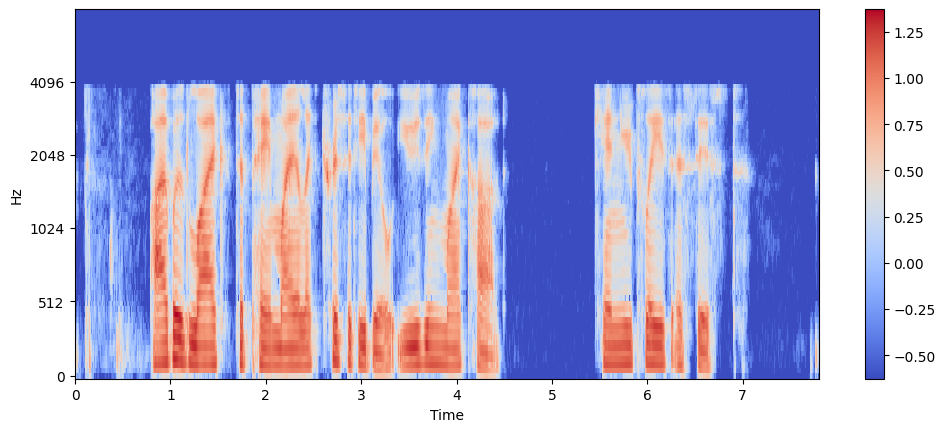

In [26]:
import numpy as np

example = minds[0]
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()

In [27]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("openai/whisper-small")

# Streaming audio data

In [28]:
gigaspeech = load_dataset("speechcolab/gigaspeech", "xs", streaming=True)

gigaspeech.py:   0%|          | 0.00/16.6k [00:00<?, ?B/s]

The repository for speechcolab/gigaspeech contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/speechcolab/gigaspeech.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [29]:
next(iter(gigaspeech["train"]))

{'segment_id': 'YOU0000000315_S0000660',
 'speaker': 'N/A',
 'text': "AS THEY'RE LEAVING <COMMA> CAN KASH PULL ZAHRA ASIDE REALLY QUICKLY <QUESTIONMARK>",
 'audio': {'path': 'xs_chunks_0000/YOU0000000315_S0000660.wav',
  'array': array([0.0005188 , 0.00085449, 0.00012207, ..., 0.00125122, 0.00076294,
         0.00036621]),
  'sampling_rate': 16000},
 'begin_time': 2941.889892578125,
 'end_time': 2945.070068359375,
 'audio_id': 'YOU0000000315',
 'title': 'Return to Vasselheim | Critical Role: VOX MACHINA | Episode 43',
 'url': 'https://www.youtube.com/watch?v=zr2n1fLVasU',
 'source': 2,
 'category': 24,
 'original_full_path': 'audio/youtube/P0004/YOU0000000315.opus'}

In [30]:
gigaspeech_head = gigaspeech["train"].take(2)
list(gigaspeech_head)

[{'segment_id': 'YOU0000000315_S0000660',
  'speaker': 'N/A',
  'text': "AS THEY'RE LEAVING <COMMA> CAN KASH PULL ZAHRA ASIDE REALLY QUICKLY <QUESTIONMARK>",
  'audio': {'path': 'xs_chunks_0000/YOU0000000315_S0000660.wav',
   'array': array([0.0005188 , 0.00085449, 0.00012207, ..., 0.00125122, 0.00076294,
          0.00036621]),
   'sampling_rate': 16000},
  'begin_time': 2941.889892578125,
  'end_time': 2945.070068359375,
  'audio_id': 'YOU0000000315',
  'title': 'Return to Vasselheim | Critical Role: VOX MACHINA | Episode 43',
  'url': 'https://www.youtube.com/watch?v=zr2n1fLVasU',
  'source': 2,
  'category': 24,
  'original_full_path': 'audio/youtube/P0004/YOU0000000315.opus'},
 {'segment_id': 'AUD0000001043_S0000775',
  'speaker': 'N/A',
  'text': 'SIX TOMATOES <PERIOD>',
  'audio': {'path': 'xs_chunks_0000/AUD0000001043_S0000775.wav',
   'array': array([ 1.43432617e-03,  1.37329102e-03,  1.31225586e-03, ...,
          -6.10351562e-05, -1.22070312e-04, -1.83105469e-04]),
   'sampl